In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics  import f1_score, accuracy_score, classification_report, confusion_matrix, recall_score, precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pca import pca
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [2]:
df = pd.read_csv('/Users/oumaymabamoh/PycharmProjects/BreastCancerPrediction/data/processed /data_clean.csv', index_col=False)
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


Splitting the dataset

In [3]:
X=df.drop(['diagnosis'],axis=1)
y=df['diagnosis'].map(lambda x: 1 if x == 'M' else 0)

In [4]:
X

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

Train Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [7]:
X_train

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
179,873586,12.810,13.06,81.29,508.8,0.08739,0.03774,0.009193,0.01330,0.1466,...,13.63,16.15,86.70,570.7,0.1162,0.05445,0.02758,0.03990,0.1783,0.07319
155,8711003,12.250,17.94,78.27,460.3,0.08654,0.06679,0.038850,0.02331,0.1970,...,13.59,25.22,86.60,564.2,0.1217,0.17880,0.19430,0.08211,0.3113,0.08132
359,901034301,9.436,18.32,59.82,278.6,0.10090,0.05956,0.027100,0.01406,0.1506,...,12.02,25.02,75.79,439.6,0.1333,0.10490,0.11440,0.05052,0.2454,0.08136
225,88143502,14.340,13.47,92.51,641.2,0.09906,0.07624,0.057240,0.04603,0.2075,...,16.77,16.90,110.40,873.2,0.1297,0.15250,0.16320,0.10870,0.3062,0.06072
89,861598,14.640,15.24,95.77,651.9,0.11320,0.13390,0.099660,0.07064,0.2116,...,16.34,18.24,109.40,803.6,0.1277,0.30890,0.26040,0.13970,0.3151,0.08473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,871642,10.660,15.15,67.49,349.6,0.08792,0.04302,0.000000,0.00000,0.1928,...,11.54,19.20,73.20,408.3,0.1076,0.06791,0.00000,0.00000,0.2710,0.06164
490,91376701,12.250,22.44,78.18,466.5,0.08192,0.05200,0.017140,0.01261,0.1544,...,14.17,31.99,92.74,622.9,0.1256,0.18040,0.12300,0.06335,0.3100,0.08203
265,88995002,20.730,31.12,135.70,1419.0,0.09469,0.11430,0.136700,0.08646,0.1769,...,32.49,47.16,214.00,3432.0,0.1401,0.26440,0.34420,0.16590,0.2868,0.08218
236,88299702,23.210,26.97,153.50,1670.0,0.09509,0.16820,0.195000,0.12370,0.1909,...,31.01,34.51,206.00,2944.0,0.1481,0.41260,0.58200,0.25930,0.3103,0.08677


In [8]:
X_test

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
294,891716,12.72,13.78,81.78,492.1,0.09667,0.08393,0.01288,0.01924,0.1638,...,13.50,17.48,88.54,553.7,0.1298,0.1472,0.05233,0.06343,0.2369,0.06922
188,874662,11.81,17.39,75.27,428.9,0.10070,0.05562,0.02353,0.01553,0.1718,...,12.57,26.48,79.57,489.5,0.1356,0.1000,0.08803,0.04306,0.3200,0.06576
492,914062,18.01,20.56,118.40,1007.0,0.10010,0.12890,0.11700,0.07762,0.2116,...,21.53,26.06,143.40,1426.0,0.1309,0.2327,0.25440,0.14890,0.3251,0.07625
496,914366,12.65,18.17,82.69,485.6,0.10760,0.13340,0.08017,0.05074,0.1641,...,14.38,22.15,95.29,633.7,0.1533,0.3842,0.35820,0.14070,0.3230,0.10330
82,8611555,25.22,24.91,171.50,1878.0,0.10630,0.26650,0.33390,0.18450,0.1829,...,30.00,33.62,211.70,2562.0,0.1573,0.6076,0.64760,0.28670,0.2355,0.10510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,915940,14.58,13.66,94.29,658.8,0.09832,0.08918,0.08222,0.04349,0.1739,...,16.76,17.24,108.50,862.0,0.1223,0.1928,0.24920,0.09186,0.2626,0.07048
323,895100,20.34,21.51,135.90,1264.0,0.11700,0.18750,0.25650,0.15040,0.2569,...,25.30,31.86,171.10,1938.0,0.1592,0.4492,0.53440,0.26850,0.5558,0.10240
138,868826,14.95,17.57,96.85,678.1,0.11670,0.13050,0.15390,0.08624,0.1957,...,18.55,21.43,121.40,971.4,0.1411,0.2164,0.33550,0.16670,0.3414,0.07147
240,88350402,13.64,15.60,87.38,575.3,0.09423,0.06630,0.04705,0.03731,0.1717,...,14.85,19.05,94.11,683.4,0.1278,0.1291,0.15330,0.09222,0.2530,0.06510


In [9]:
y_train

179    0
155    0
359    0
225    0
89     0
      ..
174    0
490    0
265    1
236    1
426    0
Name: diagnosis, Length: 455, dtype: int64

Scaling  data

In [10]:
scaler = StandardScaler()

In [11]:
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_train

array([[-0.23911648, -0.3672661 , -1.44071114, ..., -1.11113028,
        -1.81133057, -0.59246664],
       [-0.1798923 , -0.52705798, -0.31400908, ..., -0.48231956,
         0.32639375, -0.15157872],
       [ 6.56303328, -1.33001221, -0.22627409, ..., -0.95292204,
        -0.73282454, -0.14940953],
       ...,
       [ 0.42678135,  1.89264772,  2.72901   , ...,  0.76591663,
        -0.06739757, -0.10494113],
       [ 0.42152725,  2.6002975 ,  1.77085149, ...,  2.1573149 ,
         0.31032063,  0.14397345],
       [-0.2388609 , -1.03211448, -0.99741853, ..., -0.31859936,
         0.17691378,  0.66945978]])

In [12]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((455, 31), (455,), (114, 31), (114,))

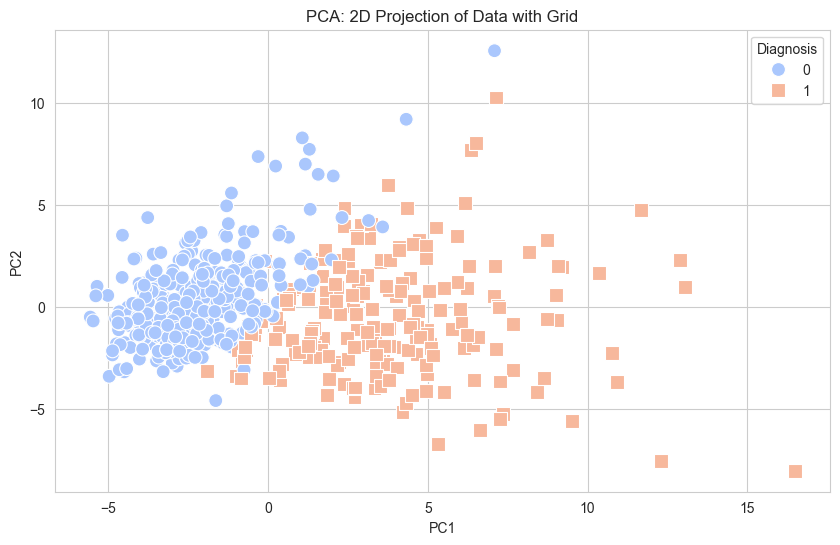

In [13]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_standardized)

# Create a DataFrame with the principal components and the target variable
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Diagnosis'] = y

# Visualize the data in 2D using PCA components with grid
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Diagnosis', data=pca_df, palette='coolwarm', style='Diagnosis', markers=['o', 's'], s=100)
plt.title('PCA: 2D Projection of Data with Grid')
plt.grid(True)
plt.show()

Model

In [14]:
import pandas as pd

# Create an empty DataFrame
model_comparison = pd.DataFrame(columns=['Model', 'Training Accuracy', 'Testing Accuracy', 'F1 Score', 'Recall', 'Precision'])
model_comparison

,Model,Training Accuracy,Testing Accuracy,F1 Score,Recall,Precision


Logistic Regression

In [15]:
LR=LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [16]:
y_pred=LR.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1])

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        73
           1       0.98      0.98      0.98        41

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Training Accuracy: 0.989010989010989
Testing Accuracy: 0.9824561403508771
F1 Score: 0.975609756097561
Recall: 0.975609756097561
Precision: 0.975609756097561


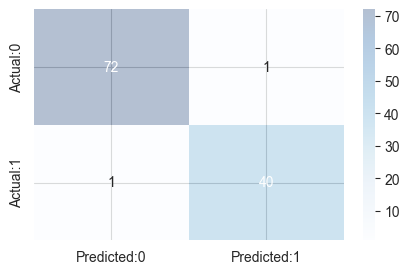

In [17]:
# Display classification report
print(classification_report(y_test, y_pred))

# Calculate and display metrics
train_acc = LR.score(X_train, y_train)
test_acc = accuracy_score(y_test, y_pred)
recal = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)
print("F1 Score:", f1)
print("Recall:", recal)
print("Precision:", prec)

model_comparison.loc[0]=['Logistic Regression', train_acc, test_acc, f1, recal, prec]

# Create a confusion matrix and display it using seaborn heatmap
conf_matrix = pd.DataFrame(data=confusion_matrix(y_test, y_pred),
                           columns=['Predicted:0', 'Predicted:1'],
                           index=['Actual:0', 'Actual:1'])

plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap= plt.cm.Blues, alpha=0.3)
plt.show()

Support Vector Machine

In [18]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)

SVC()

In [19]:
y_pred=svm.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1])

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        73
           1       0.98      0.98      0.98        41

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Training Accuracy: 0.9868131868131869
Testing Accuracy: 0.9824561403508771
F1 Score: 0.975609756097561
Recall: 0.975609756097561
Precision: 0.975609756097561


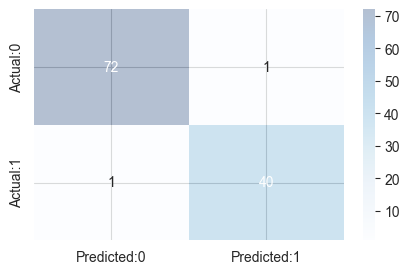

In [20]:
# Display classification report
print(classification_report(y_test, y_pred))

# Calculate and display metrics
train_acc = svm.score(X_train, y_train)  # Training accuracy
test_acc = accuracy_score(y_test, y_pred)  # Testing accuracy
recal = recall_score(y_test, y_pred)  # Recall
prec = precision_score(y_test, y_pred)  # Precision
f1 = f1_score(y_test, y_pred)  # F1 score

# Print performance metrics
print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)
print("F1 Score:", f1)
print("Recall:", recal)
print("Precision:", prec)


model_comparison.loc[1]=['Support Vector Machine', train_acc, test_acc, f1, recal, prec]

# Create a confusion matrix and display it using seaborn heatmap with blue colormap
conf_matrix = pd.DataFrame(data=confusion_matrix(y_test, y_pred),
                           columns=['Predicted:0', 'Predicted:1'],
                           index=['Actual:0', 'Actual:1'])

# Plot the confusion matrix heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, alpha=0.3)
plt.show()

KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [22]:
y_pred=knn.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1])

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        73
           1       0.95      0.93      0.94        41

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Training Accuracy: 0.9736263736263736
Testing Accuracy: 0.956140350877193
F1 Score: 0.9382716049382716
Recall: 0.926829268292683
Precision: 0.95


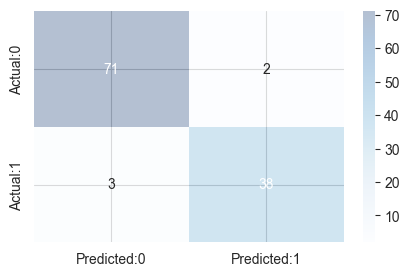

In [23]:
# Display classification report
print(classification_report(y_test, y_pred))

# Calculate and display metrics
train_acc = knn.score(X_train, y_train)  # Training accuracy
test_acc = accuracy_score(y_test, y_pred)  # Testing accuracy
recal = recall_score(y_test, y_pred)  # Recall
prec = precision_score(y_test, y_pred)  # Precision
f1 = f1_score(y_test, y_pred)  # F1 score

# Print performance metrics
print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)
print("F1 Score:", f1)
print("Recall:", recal)
print("Precision:", prec)

model_comparison.loc[2]=['KNN', train_acc, test_acc, f1, recal, prec]

# Create a confusion matrix and display it using seaborn heatmap with blue colormap
conf_matrix = pd.DataFrame(data=confusion_matrix(y_test, y_pred),
                           columns=['Predicted:0', 'Predicted:1'],
                           index=['Actual:0', 'Actual:1'])

# Plot the confusion matrix heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, alpha=0.3)
plt.show()

Naives Bayes

In [24]:
NB = GaussianNB()
NB.fit(X_train,y_train)

GaussianNB()

In [25]:
y_pred=NB.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0])

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        73
           1       0.92      0.88      0.90        41

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

Training Accuracy: 0.9406593406593406
Testing Accuracy: 0.9298245614035088
F1 Score: 0.9
Recall: 0.8780487804878049
Precision: 0.9230769230769231


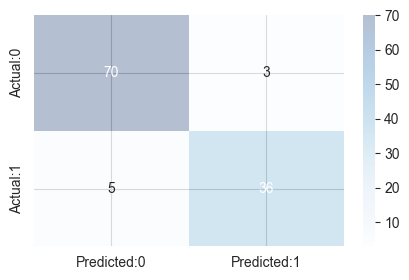

In [26]:
# Display classification report
print(classification_report(y_test, y_pred))

# Calculate and display metrics for Naive Bayes (NB) model
train_acc = NB.score(X_train, y_train)  # Training accuracy
test_acc = accuracy_score(y_test, y_pred)  # Testing accuracy
recal = recall_score(y_test, y_pred)  # Recall
prec = precision_score(y_test, y_pred)  # Precision
f1 = f1_score(y_test, y_pred)  # F1 score

# Print performance metrics for Naive Bayes (NB) model
print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)
print("F1 Score:", f1)
print("Recall:", recal)
print("Precision:", prec)

model_comparison.loc[3]=['Gaussian Naives Bayes', train_acc, test_acc, f1, recal, prec]

# Create a confusion matrix and display it using seaborn heatmap
conf_matrix = pd.DataFrame(data=confusion_matrix(y_test, y_pred),
                           columns=['Predicted:0', 'Predicted:1'],
                           index=['Actual:0', 'Actual:1'])

# Plot the confusion matrix heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, alpha=0.3)
plt.show()

Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(random_state=8)
DT.fit(X_train,y_train)

DecisionTreeClassifier(random_state=8)

In [28]:
y_pred=DT.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0])

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        73
           1       0.92      0.88      0.90        41

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

Training Accuracy: 1.0
Testing Accuracy: 0.9298245614035088
F1 Score: 0.9
Recall: 0.8780487804878049
Precision: 0.9230769230769231


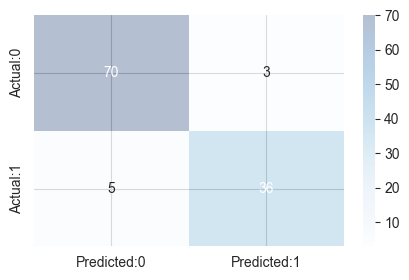

In [29]:
# Display classification report
print(classification_report(y_test, y_pred))

# Calculate and display metrics for Decision Tree (DT) model
train_acc = DT.score(X_train, y_train)  # Training accuracy
test_acc = accuracy_score(y_test, y_pred)  # Testing accuracy
recal = recall_score(y_test, y_pred)  # Recall
prec = precision_score(y_test, y_pred)  # Precision
f1 = f1_score(y_test, y_pred)  # F1 score

# Print performance metrics for Decision Tree (DT) model
print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)
print("F1 Score:", f1)
print("Recall:", recal)
print("Precision:", prec)

model_comparison.loc[4]=['Decision Tree', train_acc, test_acc, f1, recal, prec]

# Create a confusion matrix and display it using seaborn heatmap with blue color
conf_matrix = pd.DataFrame(data=confusion_matrix(y_test, y_pred),
                           columns=['Predicted:0', 'Predicted:1'],
                           index=['Actual:0', 'Actual:1'])

# Plot the confusion matrix heatmap with blue color
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, alpha=0.3)
plt.show()

Random forest

In [30]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
RF=RandomForestClassifier(n_estimators=50,random_state=1)
RF.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=1)

In [31]:
y_pred=RF.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0])

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        73
           1       0.93      0.93      0.93        41

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Training Accuracy: 1.0
Testing Accuracy: 0.9473684210526315
F1 Score: 0.926829268292683
Recall: 0.926829268292683
Precision: 0.926829268292683


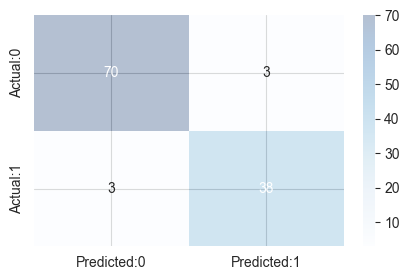

In [32]:
# Display classification report
print(classification_report(y_test, y_pred))

# Calculate and display metrics for Random Forest (RF) model
train_acc = RF.score(X_train, y_train)  # Training accuracy
test_acc = accuracy_score(y_test, y_pred)  # Testing accuracy
recal = recall_score(y_test, y_pred)  # Recall
prec = precision_score(y_test, y_pred)  # Precision
f1 = f1_score(y_test, y_pred)  # F1 score

# Print performance metrics for Random Forest (RF) model
print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)
print("F1 Score:", f1)
print("Recall:", recal)
print("Precision:", prec)

model_comparison.loc[5]=['Random forest', train_acc, test_acc, f1, recal, prec]

# Create a confusion matrix and display it using seaborn heatmap without specifying color (default color)
conf_matrix = pd.DataFrame(data=confusion_matrix(y_test, y_pred),
                           columns=['Predicted:0', 'Predicted:1'],
                           index=['Actual:0', 'Actual:1'])

# Plot the confusion matrix heatmap without specifying color (default color)
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, alpha=0.3)
plt.show()

Gradient Boosting

In [33]:
GB=GradientBoostingClassifier(n_estimators=12)
GB.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=12)

In [34]:
y_pred=GB.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0])

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        73
           1       0.90      0.90      0.90        41

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

Training Accuracy: 0.9912087912087912
Testing Accuracy: 0.9298245614035088
F1 Score: 0.9024390243902439
Recall: 0.9024390243902439
Precision: 0.9024390243902439


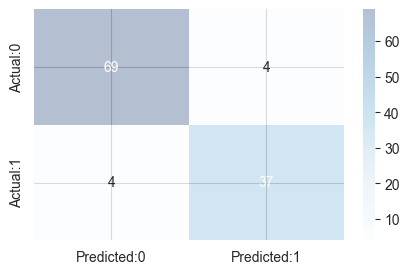

In [35]:
# Display classification report
print(classification_report(y_test, y_pred))

# Calculate and display metrics for Gradient Boosting (GB) model
train_acc = GB.score(X_train, y_train)  # Training accuracy
test_acc = accuracy_score(y_test, y_pred)  # Testing accuracy
recal = recall_score(y_test, y_pred)  # Recall
prec = precision_score(y_test, y_pred)  # Precision
f1 = f1_score(y_test, y_pred)  # F1 score

# Print performance metrics for Gradient Boosting (GB) model
print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)
print("F1 Score:", f1)
print("Recall:", recal)
print("Precision:", prec)

model_comparison.loc[6]=['Gradient Boosting', train_acc, test_acc, f1, recal, prec]

# Create a confusion matrix and display it using seaborn heatmap with specified color (blue)
conf_matrix = pd.DataFrame(data=confusion_matrix(y_test, y_pred),
                           columns=['Predicted:0', 'Predicted:1'],
                           index=['Actual:0', 'Actual:1'])

# Plot the confusion matrix heatmap with specified color (blue)
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, alpha=0.3)
plt.show()


XGBoost

In [36]:
from xgboost.sklearn import XGBClassifier
XGB= XGBClassifier(random_state=0,n_estimators=88,booster='gbtree')
XGB.fit(X_train,y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=88, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [37]:
y_pred=XGB.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0])

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        73
           1       0.95      0.93      0.94        41

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Training Accuracy: 1.0
Testing Accuracy: 0.956140350877193
F1 Score: 0.9382716049382716
Recall: 0.926829268292683
Precision: 0.95


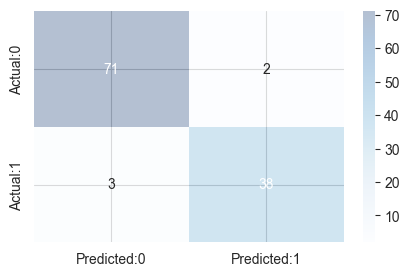

In [38]:
# Display classification report
print(classification_report(y_test, y_pred))

# Calculate and display metrics for XGBoost (XGB) model
train_acc = XGB.score(X_train, y_train)  # Training accuracy
test_acc = accuracy_score(y_test, y_pred)  # Testing accuracy
recal = recall_score(y_test, y_pred)  # Recall
prec = precision_score(y_test, y_pred)  # Precision
f1 = f1_score(y_test, y_pred)  # F1 score

# Print performance metrics for XGBoost (XGB) model
print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)
print("F1 Score:", f1)
print("Recall:", recal)
print("Precision:", prec)

model_comparison.loc[8]=['XGBoost', train_acc, test_acc, f1, recal, prec]

# Create a confusion matrix and display it using seaborn heatmap without specifying color
conf_matrix = pd.DataFrame(data=confusion_matrix(y_test, y_pred),
                           columns=['Predicted:0', 'Predicted:1'],
                           index=['Actual:0', 'Actual:1'])

# Plot the confusion matrix heatmap without specifying color
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, alpha=0.3)
plt.show()

Model Selection

In [39]:
model_comparison

,Model,Training Accuracy,Testing Accuracy,F1 Score,Recall,Precision
0,Logistic Regression,0.989011,0.982456,0.975610,0.975610,0.975610
1,Support Vector Machine,0.986813,0.982456,0.975610,0.975610,0.975610
2,KNN,0.973626,0.956140,0.938272,0.926829,0.950000
3,Gaussian Naives Bayes,0.940659,0.929825,0.900000,0.878049,0.923077
4,Decision Tree,1.000000,0.929825,0.900000,0.878049,0.923077
5,Random forest,1.000000,0.947368,0.926829,0.926829,0.926829
6,Gradient Boosting,0.991209,0.929825,0.902439,0.902439,0.902439
8,XGBoost,1.000000,0.956140,0.938272,0.926829,0.950000


/var/folders/tz/36qz0vtn4rb0h9dh9ghf_dpr0000gp/T/ipykernel_1375/29036476.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=model_comparison, y='Model', x='Training Accuracy', palette="Blues")


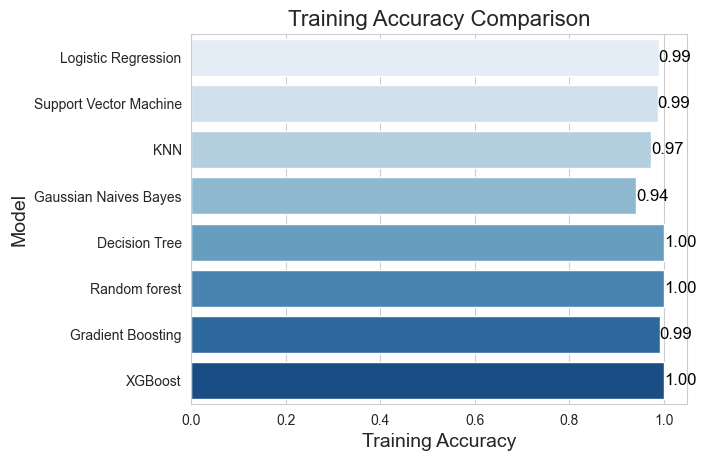

In [40]:
ax=sns.barplot(data=model_comparison,y='Model',x='Training Accuracy')
# Set the style
sns.set_theme(style="whitegrid")

# Bar plot
ax = sns.barplot(data=model_comparison, y='Model', x='Training Accuracy', palette="Blues")

# Annotate the bars with values
for index, value in enumerate(model_comparison['Training Accuracy']):
    ax.text(value, index, f'{value:.2f}', ha='left', va='center', color='black', fontsize=12)

plt.title('Training Accuracy Comparison', fontsize=16)
plt.xlabel('Training Accuracy', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.show()

/var/folders/tz/36qz0vtn4rb0h9dh9ghf_dpr0000gp/T/ipykernel_1375/825708878.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=model_comparison, y='Model', x='Testing Accuracy', palette="Blues_r")


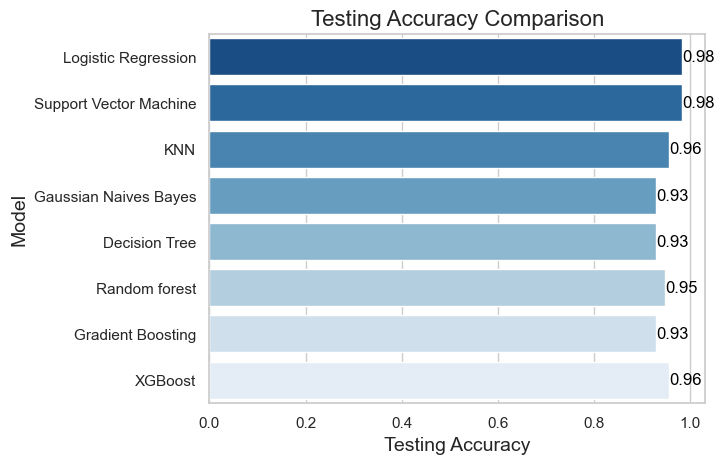

In [41]:
# Set the style
sns.set_theme(style="whitegrid")

# Bar plot
ax = sns.barplot(data=model_comparison, y='Model', x='Testing Accuracy', palette="Blues_r")

# Annotate the bars with values
for index, value in enumerate(model_comparison['Testing Accuracy']):
    ax.text(value, index, f'{value:.2f}', ha='left', va='center', color='black', fontsize=12)

plt.title('Testing Accuracy Comparison', fontsize=16)
plt.xlabel('Testing Accuracy', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.show()

/var/folders/tz/36qz0vtn4rb0h9dh9ghf_dpr0000gp/T/ipykernel_1375/72442067.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=model_comparison, y='Model', x='F1 Score', palette="Greens_r")


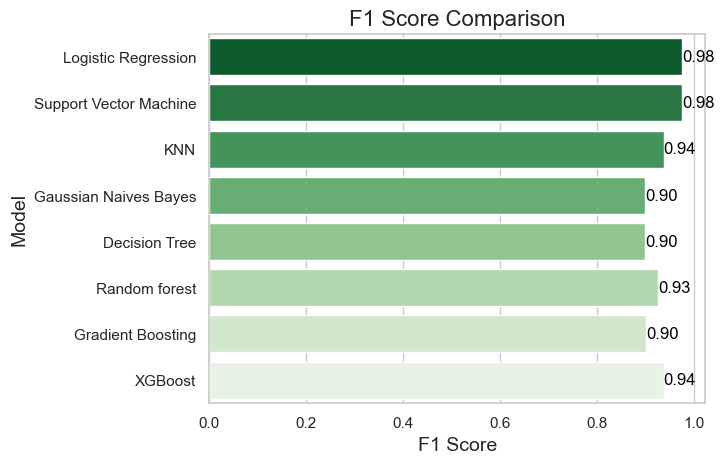

In [42]:
# Set the style
sns.set_theme(style="whitegrid")

# Bar plot
ax = sns.barplot(data=model_comparison, y='Model', x='F1 Score', palette="Greens_r")

# Annotate the bars with values
for index, value in enumerate(model_comparison['F1 Score']):
    ax.text(value, index, f'{value:.2f}', ha='left', va='center', color='black', fontsize=12)

plt.title('F1 Score Comparison', fontsize=16)
plt.xlabel('F1 Score', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.show()

/var/folders/tz/36qz0vtn4rb0h9dh9ghf_dpr0000gp/T/ipykernel_1375/3290121775.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=model_comparison, y='Model', x='Precision', palette="Blues")


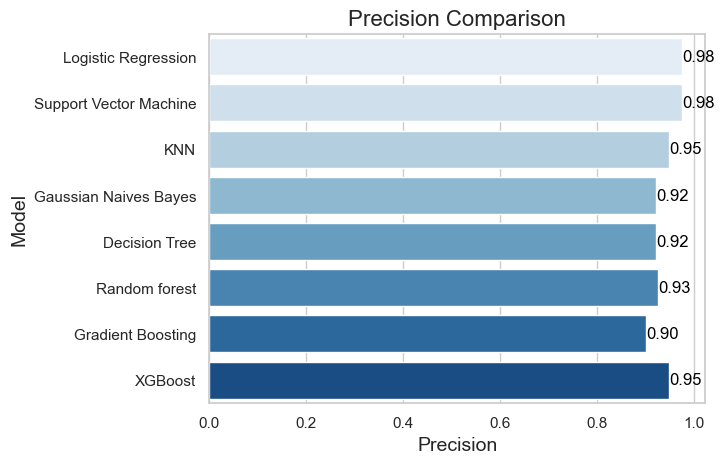

In [43]:
# Set the style
sns.set_theme(style="whitegrid")

# Bar plot
ax = sns.barplot(data=model_comparison, y='Model', x='Precision', palette="Blues")

# Annotate the bars with values
for index, value in enumerate(model_comparison['Precision']):
    ax.text(value, index, f'{value:.2f}', ha='left', va='center', color='black', fontsize=12)

plt.title('Precision Comparison', fontsize=16)
plt.xlabel('Precision', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.show()

/var/folders/tz/36qz0vtn4rb0h9dh9ghf_dpr0000gp/T/ipykernel_1375/3397842002.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=model_comparison, y='Model', x='Recall', palette="Greens")


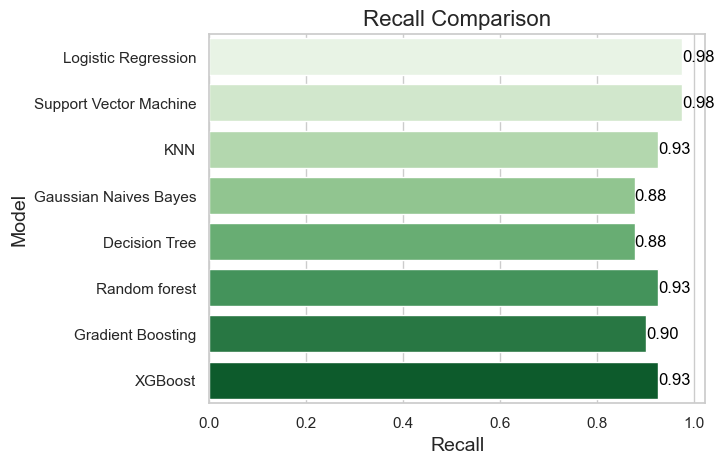

In [44]:
# Set the style
sns.set_theme(style="whitegrid")

# Bar plot
ax = sns.barplot(data=model_comparison, y='Model', x='Recall', palette="Greens")

# Annotate the bars with values
for index, value in enumerate(model_comparison['Recall']):
    ax.text(value, index, f'{value:.2f}', ha='left', va='center', color='black', fontsize=12)

plt.title('Recall Comparison', fontsize=16)
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.show()

Error analysis- cross validation

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('SVM', SVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('XGB', XGBClassifier()))


# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'

# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
print('\n➔ 10-Fold cross-validation accurcay score for the training data for six classifiers')

LR: 0.969324 (0.034022)
SVM: 0.964783 (0.031412)
KNN: 0.962560 (0.026103)
NB: 0.936184 (0.030374)
CART: 0.925362 (0.044866)
RF: 0.958213 (0.030067)
GB: 0.949420 (0.031182)
XGB: 0.964928 (0.022192)

➔ 10-Fold cross-validation accurcay score for the training data for six classifiers


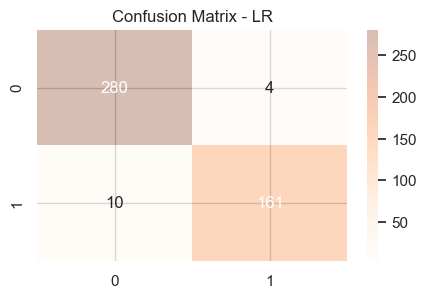

Classification Report - LR:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       284
           1       0.98      0.94      0.96       171

    accuracy                           0.97       455
   macro avg       0.97      0.96      0.97       455
weighted avg       0.97      0.97      0.97       455


LR: 0.97 (455)


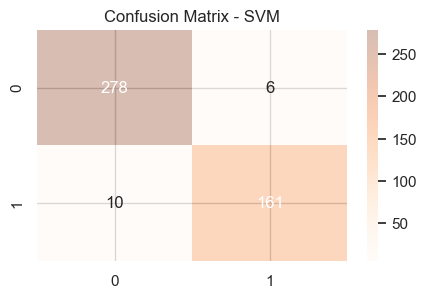

Classification Report - SVM:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       284
           1       0.96      0.94      0.95       171

    accuracy                           0.96       455
   macro avg       0.96      0.96      0.96       455
weighted avg       0.96      0.96      0.96       455


SVM: 0.96 (455)


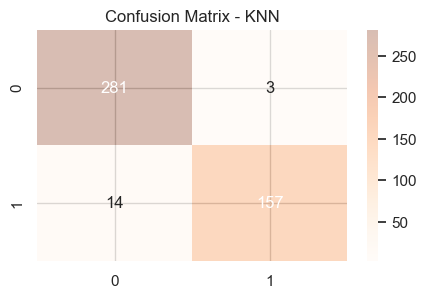

Classification Report - KNN:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       284
           1       0.98      0.92      0.95       171

    accuracy                           0.96       455
   macro avg       0.97      0.95      0.96       455
weighted avg       0.96      0.96      0.96       455


KNN: 0.96 (455)


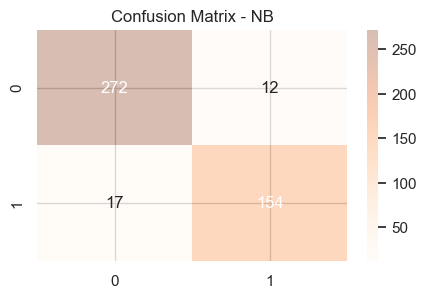

Classification Report - NB:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       284
           1       0.93      0.90      0.91       171

    accuracy                           0.94       455
   macro avg       0.93      0.93      0.93       455
weighted avg       0.94      0.94      0.94       455


NB: 0.94 (455)


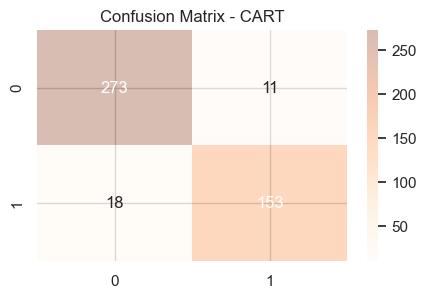

Classification Report - CART:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       284
           1       0.93      0.89      0.91       171

    accuracy                           0.94       455
   macro avg       0.94      0.93      0.93       455
weighted avg       0.94      0.94      0.94       455


CART: 0.94 (455)


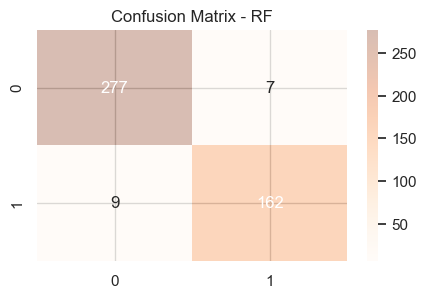

Classification Report - RF:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       284
           1       0.96      0.95      0.95       171

    accuracy                           0.96       455
   macro avg       0.96      0.96      0.96       455
weighted avg       0.96      0.96      0.96       455


RF: 0.96 (455)


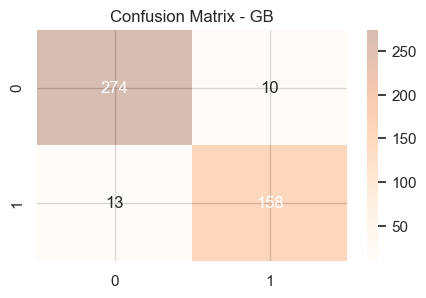

Classification Report - GB:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       284
           1       0.94      0.92      0.93       171

    accuracy                           0.95       455
   macro avg       0.95      0.94      0.95       455
weighted avg       0.95      0.95      0.95       455


GB: 0.95 (455)


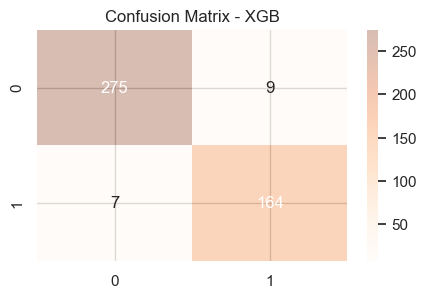

Classification Report - XGB:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       284
           1       0.95      0.96      0.95       171

    accuracy                           0.96       455
   macro avg       0.96      0.96      0.96       455
weighted avg       0.96      0.96      0.96       455


XGB: 0.96 (455)

➔ 10-Fold cross-validation accuracy score for the training data for six classifiers

Feature importance not available for this model.


<Figure size 1000x600 with 0 Axes>

In [46]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Spot-Check Algorithms
models = [
    ('LR', LogisticRegression()),
    ('SVM', SVC()),
    ('KNN', KNeighborsClassifier()),
    ('NB', GaussianNB()),
    ('CART', DecisionTreeClassifier()),
    ('RF', RandomForestClassifier()),
    ('GB', GradientBoostingClassifier()),
    ('XGB', XGBClassifier())
]

# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

    # Cross-validation predictions
    y_pred = cross_val_predict(model, X_train, y_train, cv=kfold)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_train, y_pred)
    plt.figure(figsize=(5, 3))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', alpha=0.3)
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    # Classification Report
    class_report = classification_report(y_train, y_pred)
    print(f'Classification Report - {name}:\n{class_report}\n')

    # Store results for later comparison
    results.append(class_report)
    names.append(name)

    msg = f"{name}: {class_report.split()[-2]} ({class_report.split()[-1]})"
    print(msg)

print('\n➔ 10-Fold cross-validation accuracy score for the training data for six classifiers')

# Visualize Feature Importance for one of the models (e.g., Logistic Regression)
# Assuming LR is the first model in the list
lr_model = models[0][1]
lr_model.fit(X_train, y_train)

# Feature Importance Visualization
try:
    feature_importance = lr_model.coef_[0]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance, y=X_train.columns)
    plt.title('Feature Importance - Logistic Regression')
    plt.show()
except AttributeError:
    print("\nFeature importance not available for this model.")


In [47]:
model = model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

# Extract false positives (FP), false negatives (FN), etc.
FP = np.sum((y_test == 0) & (y_pred == 1))
FN = np.sum((y_test == 1) & (y_pred == 0))
TP = np.sum((y_test == 1) & (y_pred == 1))
TN = np.sum((y_test == 0) & (y_pred == 0))

# Display error analysis metrics
print("\nError Analysis Metrics:")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")

# Feature importance (if applicable to your model type)
try:
    feature_importance = model.coef_[0]  # Replace with your actual feature importance extraction method
    print("\nFeature Importance:")
    for feature, importance in zip(X.columns, feature_importance):
        print(f"{feature}: {importance}")
except AttributeError:
    print("\nFeature importance not available for this model.")

Confusion Matrix:
[[71  2]
 [ 3 38]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        73
           1       0.95      0.93      0.94        41

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Error Analysis Metrics:
False Positives (FP): 2
False Negatives (FN): 3
True Positives (TP): 38
True Negatives (TN): 71

Feature importance not available for this model.


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming you have your X_train, y_train ready
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with a StandardScaler and Logistic Regression
pipe_lr = Pipeline([
    ('scl', StandardScaler()),
    ('model', LogisticRegression())
])

# Define the parameter grid to search
param_grid = {
    'model__penalty': ['l1', 'l2'],
    'model__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(pipe_lr, param_grid, cv=10, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Display LR results
lr_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=10, scoring='accuracy')
print('LR Model Training Accuracy: %.3f +/- %.3f' % (np.mean(lr_scores), np.std(lr_scores)))

# Display LR results in a similar format to XGB
print('\nLR Best Hyperparameters: %s' % grid_search.best_params_)
print('Validation F1 Score: %.3f' % grid_search.best_score_)


Fitting 10 folds for each of 16 candidates, totalling 160 fits


/Users/oumaymabamoh/PycharmProjects/BreastCancerPrediction/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/oumaymabamoh/PycharmProjects/BreastCancerPrediction/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver 

LR Model Training Accuracy: 0.974 +/- 0.024

LR Best Hyperparameters: {'model__C': 0.1, 'model__penalty': 'l2'}
Validation F1 Score: 0.974


In [49]:
# Import necessary libraries
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Make XGBoost Classifier Pipeline
pipe_xgb = Pipeline([
    ('scl', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('clf', XGBClassifier())
])

# Fit Pipeline to training Data
pipe_xgb.fit(X_train, y_train)

# Print Model Training Accuracy
scores = cross_val_score(estimator=pipe_xgb, X=X_train, y=y_train, cv=10, n_jobs=1, verbose=0)
print('Model Training Accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

# Tune Hyperparameters
param_grid = {
    'clf__learning_rate': [0.01, 0.1, 0.2],
    'clf__n_estimators': [50, 100, 200],
    'clf__max_depth': [3, 5, 7],
    'clf__min_child_weight': [1, 3, 5],
    'clf__subsample': [0.8, 0.9, 1.0],
    'clf__colsample_bytree': [0.8, 0.9, 1.0],
}

gs_xgb = GridSearchCV(estimator=pipe_xgb, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=1)
gs_xgb = gs_xgb.fit(X_train, y_train)

print('Tuned Parameters Best Score: ', gs_xgb.best_score_)
print('Best Parameters: \n', gs_xgb.best_params_)


Model Training Accuracy: 0.921 +/- 0.041
Tuned Parameters Best Score:  0.9428502415458937
Best Parameters: 
 {'clf__colsample_bytree': 1.0, 'clf__learning_rate': 0.1, 'clf__max_depth': 5, 'clf__min_child_weight': 3, 'clf__n_estimators': 50, 'clf__subsample': 1.0}


In [50]:
# Assuming you have the grid_search object containing the tuned LR model
lr_model = grid_search.best_estimator_['model']  # Assuming 'model' is the name of the Logistic Regression model in your pipeline
lr_coefs = lr_model.coef_[0]

# Assuming you have a DataFrame 'X' containing your features
List_col = X.columns.tolist()

# Display feature importance
feature_importance = dict(zip(List_col, lr_coefs))
sorted_importance = sorted(feature_importance.items(), key=lambda x: abs(x[1]), reverse=True)

# Print feature importance
print("Feature Importance:")
for feature, importance in sorted_importance:
    print(f"{feature}: {importance}")


Feature Importance:
texture_worst: 0.6002956656264793
radius_worst: 0.4879922565192119
symmetry_worst: 0.4779369854595548
concave points_worst: 0.4671608531102614
concave points_mean: 0.4667774611988884
radius_se: 0.46411370752462655
area_worst: 0.4347143452257575
perimeter_worst: 0.43284384283465505
texture_mean: 0.4178782158061986
concavity_worst: 0.4097884646826463
smoothness_worst: 0.37815152264610635
radius_mean: 0.36901108398853416
perimeter_mean: 0.35714549852152105
concavity_mean: 0.35556985566985605
area_mean: 0.3542557824948626
area_se: 0.3449106674567667
perimeter_se: 0.3264177248154722
fractal_dimension_se: -0.2653722158723001
compactness_se: -0.26086567624637247
fractal_dimension_mean: -0.19043525875811723
symmetry_se: -0.17616190439036655
compactness_worst: 0.15141953033020047
smoothness_mean: 0.13853112451146618
concave points_se: 0.11377433780353473
fractal_dimension_worst: 0.10809116081973175
id: 0.07054560910604366
concavity_se: -0.06239115110987657
smoothness_se: 0.0

Prediction

In [51]:
# Assuming you have the grid_search object containing the tuned LR model
def predict_cancer_lr(input_data):
    df = scaler.transform(np.array([input_data]))
    prediction = grid_search.best_estimator_.predict(df)
    return 'The tumor is Malignant (cancerous)' if prediction == 1 else 'The tumor is Benign (non-cancerous)'

List_col = [col for col in X.columns]
print(List_col)
print('----------------------------------------------------------------------------------------------------------------------')
print('\t\t\t\t *** BREAST CANCER PREDICTION SYSTEM ***')
print('----------------------------------------------------------------------------------------------------------------------')

# Ensure that the patient_data includes all 30 features
patient_data = [85922302,12.68,23.84,82.69,499.0,0.1122,0.1262,0.1128,0.06873,0.1905,0.0659,0.4255,1.178,2.927,36.46,0.007781,0.02648,0.02973,0.0129,0.01635,0.003601,17.09,33.47,111.8,888.3,0.1851,0.4061,0.4024,0.1716,0.3383,0.1031]

# Pass all features to predict_cancer_lr
result = predict_cancer_lr(patient_data)
print('PREDICTION :', end=' ')
print(result)
print('----------------------------------------------------------------------------------------------------------------------')


['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
----------------------------------------------------------------------------------------------------------------------
				 *** BREAST CANCER PREDICTION SYSTEM ***
----------------------------------------------------------------------------------------------------------------------
PREDICTION : The tumor is Malignant (cancerous)
---------------------------------------------------------------------------------------------------------------------

/Users/oumaymabamoh/PycharmProjects/BreastCancerPrediction/venv/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/oumaymabamoh/PycharmProjects/BreastCancerPrediction/venv/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
